## Clustering


In [58]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.cluster import *
from sklearn.preprocessing import *
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


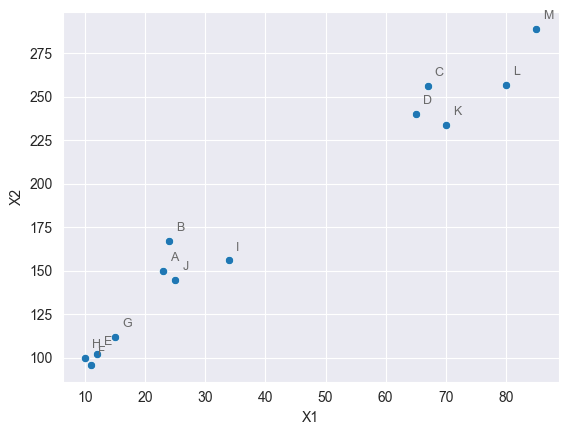

In [59]:
df=pd.read_csv(r"D:\Datasets\simp_clust.csv",index_col=0)
ax=sns.scatterplot(data=df,x='X1',y='X2',legend='auto')
for i in range(len(df)):
    ax.annotate(
        # The text label is the index value
        text=df.index[i],
        # The point coordinates are (X1, X2)
        xy=(df['X1'].iloc[i], df['X2'].iloc[i]),
        # Offset the text slightly from the point
        xytext=(5, 5),
        textcoords='offset points',
        ha='left',
        va='bottom',
        fontsize=9,
        color='dimgrey'
    )

plt.show()

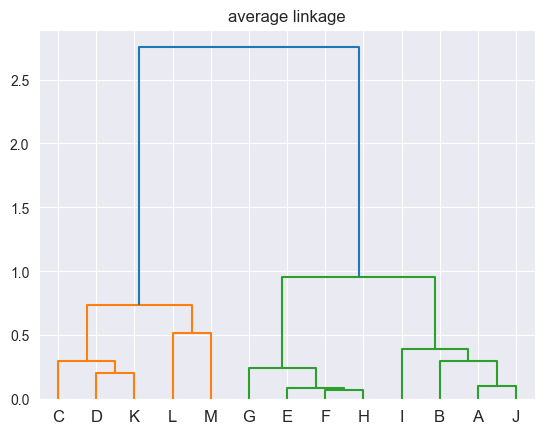

In [60]:
scaler=StandardScaler().set_output(transform='pandas')
df_scaled=scaler.fit_transform(df)
merging=linkage(df_scaled,method="average")
dendrogram(merging,labels=list(df_scaled.index))
plt.title("average linkage")
plt.show()

0.768624569487621


<Axes: xlabel='X1', ylabel='X2'>

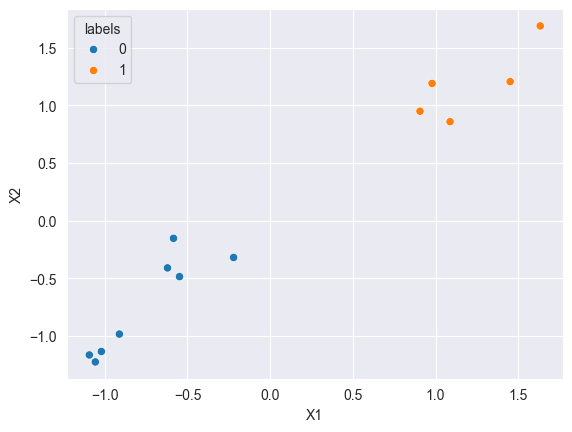

In [61]:
cluster=AgglomerativeClustering(n_clusters=2)
cluster.fit(df_scaled)
print(silhouette_score(df_scaled,cluster.labels_))
data=df_scaled.copy()
data['labels']=cluster.labels_
sns.scatterplot(data=data,x='X1',y='X2',hue='labels')

Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtype='object')
Index(['X1', 'X2', 'labels'], dtyp

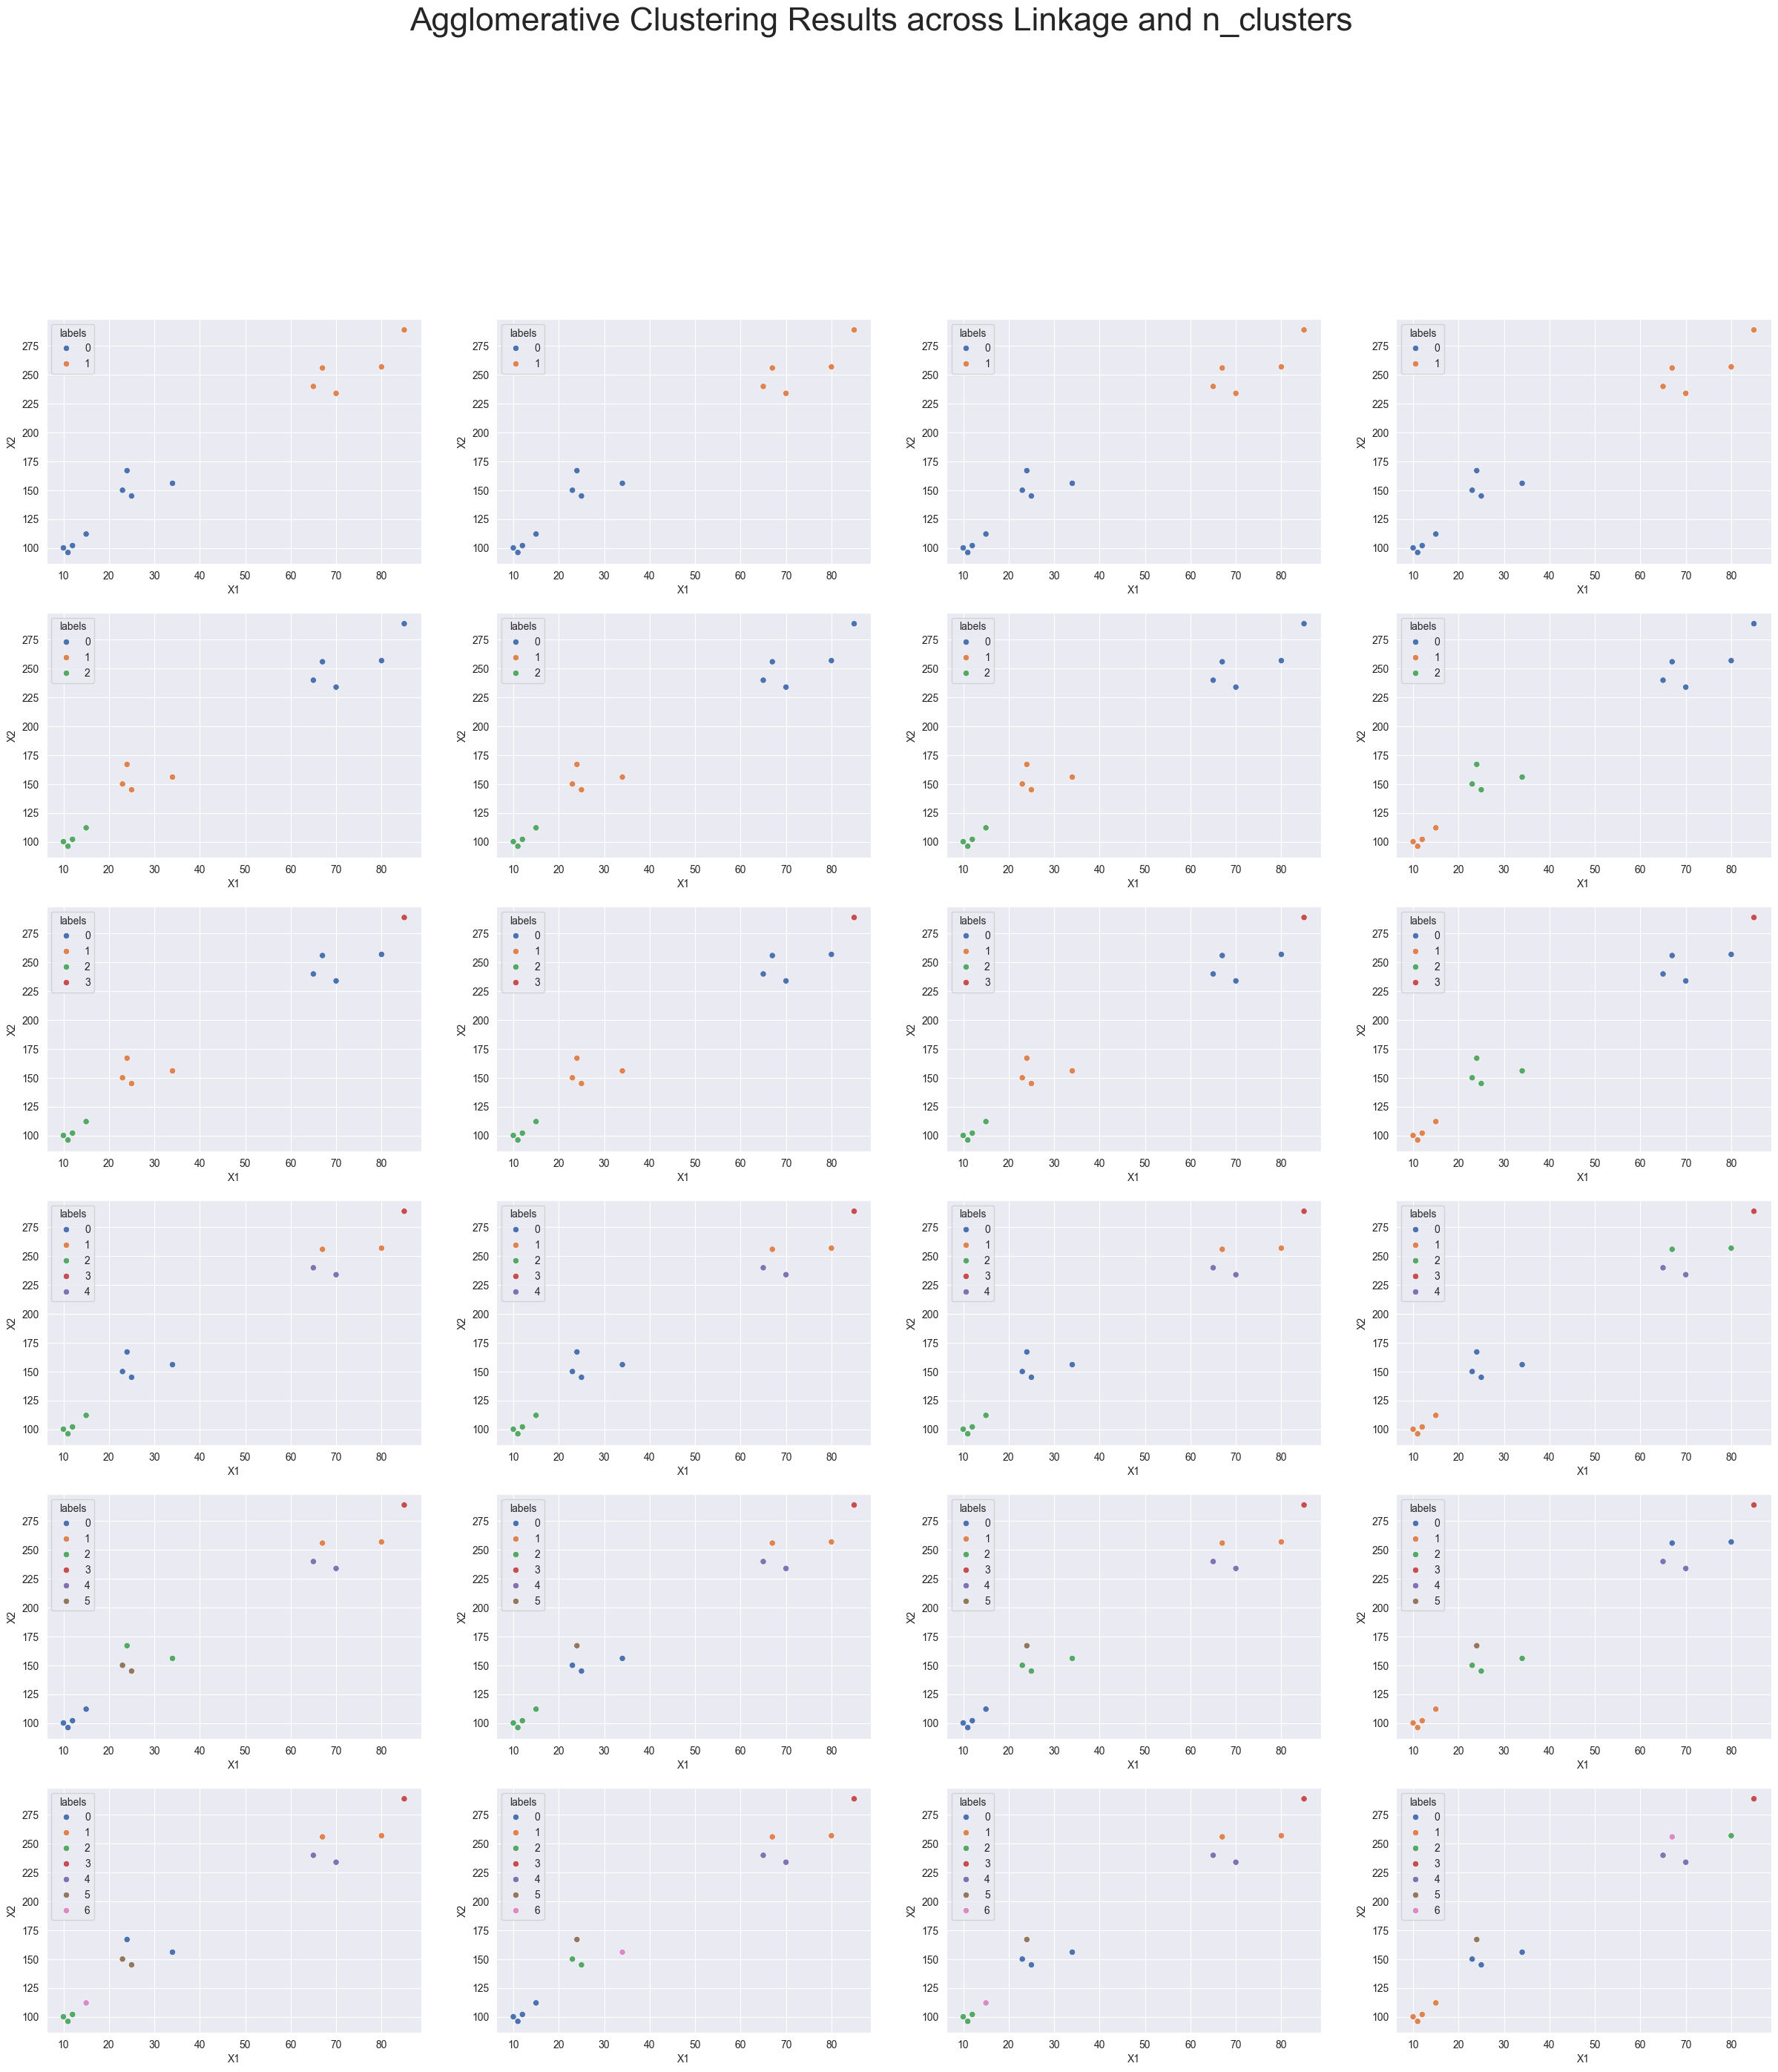

In [63]:
linkage=['ward','average','complete','single']
n_clusters=[x for x in range(2,8)]
score=[]
fig,ax=plt.subplots(6,4,figsize=(30,30))
fig.suptitle('Agglomerative Clustering Results across Linkage and n_clusters', fontsize=32, y=1.02)
ax=ax.flatten()
plot_index=0
for n in n_clusters:
    for dist in linkage:
        cluster=AgglomerativeClustering(n_clusters=n,linkage=dist)
        cluster.fit(df)
        score.append([n,dist,silhouette_score(df,cluster.labels_)])

        data_to_plot = df.copy()
        data_to_plot['labels'] = cluster.labels_
        curr_axis=ax[plot_index]
        print(data_to_plot.columns)

        sns.scatterplot(data=data_to_plot,x='X1',y='X2',hue='labels',palette='deep',ax=curr_axis)
        plot_index+=1
plt.show()

## Milkm

In [54]:
df=pd.read_csv(r"D:\Datasets\milk.csv",index_col=0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [55]:
n_clusters=[x for x in range(2,11)]
linkage=['ward','average','complete','single']
score=[]
for n in n_clusters:
    for dist in linkage:
        cluster=AgglomerativeClustering(n_clusters=n,linkage=dist)
        cluster.fit(df)
        score.append([n,dist,silhouette_score(df,cluster.labels_)])

df_scores=pd.DataFrame(data=score,columns=['n_clusters','linakge','silhouette_score'])

In [56]:
df_scores.sort_values(by='silhouette_score',ascending=False)
n_clusters=[x for x in range(2,8)]

,n_clusters,linakge,silhouette_score
1,2,average,0.688792
2,2,complete,0.688792
3,2,single,0.688792
4,3,ward,0.656372
6,3,complete,0.656372
5,3,average,0.656372
18,6,complete,0.610626
17,6,average,0.610626
16,6,ward,0.610626
0,2,ward,0.602935


## Nutrientm

In [108]:
df=pd.read_csv(r"D:\Datasets\nutrient.csv",index_col=0)
df.head()

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


In [109]:
df=StandardScaler().set_output(transform='pandas').fit_transform(df)
scores=[]
for i in range(2,11):
    cluster=KMeans(n_clusters=i,random_state=25)
    cluster.fit(df)
    scores.append([i,silhouette_score(df,cluster.labels_)])

df_scores=pd.DataFrame(data=scores,columns=['n_clusters','score'])
df_scores.sort_values(by='score',ascending=False)

,n_clusters,score
2,4,0.419974
5,7,0.402943
4,6,0.381370
3,5,0.378018
7,9,0.377910
6,8,0.377523
8,10,0.366987
1,3,0.357822
0,2,0.325778


In [112]:
cluster=KMeans(n_clusters=4,random_state=25)
cluster.fit(df)
df['labels']=cluster.labels_
df.groupby('labels').mean()

,energy,protein,fat,calcium,iron
labels,,,,,
0,-0.561247,-0.159787,-0.526389,2.398987,-0.498480
1,1.353938,-0.059920,1.393507,-0.459846,0.039065
2,-0.437783,0.410881,-0.522079,-0.314798,-0.246104
3,-1.509400,-2.396806,-1.129893,0.444490,2.314187


## Milk

In [64]:
data = pd.read_csv(r'D:\Datasets\milk.csv', index_col=0)
data

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


## Wss Scores

In [67]:
data = scaler.fit_transform(data)

In [68]:
model = KMeans(random_state=25, n_clusters=3)
model.fit(data)
print(model.labels_)
model.inertia_

[1 1 1 1 1 2 2 2 2 2 2 2 1 2 1 2 2 2 0 0 0 0 0 0 0]


36.59621161459346

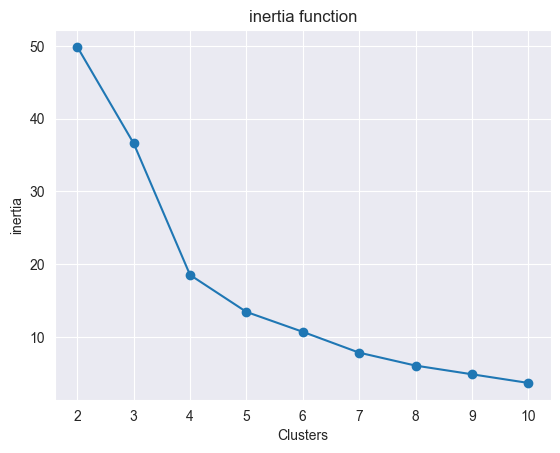

In [69]:
inertia = []
for i in range(2, 11):
    model = KMeans(random_state=25, n_clusters=i)
    model.fit(data)
    inertia.append([i, model.inertia_])
df_inertia = pd.DataFrame(inertia, columns=['clusters', 'inertia'])
plt.scatter(df_inertia['clusters'], df_inertia['inertia'])
plt.plot(df_inertia['clusters'], df_inertia['inertia'])
plt.xlabel('Clusters')
plt.ylabel('inertia')
plt.title('inertia function')
plt.show()

## silhouids scores

In [73]:
scores = []
for c in range(2,11):
    clust = KMeans(random_state = 25,n_clusters = c)
    clust.fit(data)
    scores.append([c,silhouette_score(data,clust.labels_)])
pd.DataFrame(scores,columns = ['c','sc']).sort_values('sc',ascending = False)

,c,sc
0,2,0.525851
2,4,0.423246
4,6,0.412161
8,10,0.407573
7,9,0.406707
3,5,0.399843
5,7,0.398780
6,8,0.397209
1,3,0.353503


## select Best params

In [79]:
cluster=KMeans(random_state=25,n_clusters=2)
cluster.fit(data)
df_copy=data.copy()
df_copy['labels']=cluster.labels_
# df_copy
df_copy.groupby('labels').mean()

,water,protein,fat,lactose,ash
labels,,,,,
0,-1.180155,1.173734,1.101791,-1.201792,0.979126
1,0.555367,-0.552345,-0.518490,0.565549,-0.460765
